In [6]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.reset_defaults()
sns.set_style("whitegrid")

In [7]:
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

In [8]:
def get_rc_data(ensemble: pd.DataFrame, edges: pd.DataFrame):
    network_nos = ensemble['network_no'].unique()
    rc_df = pd.DataFrame(columns=['degree', 'null_rc_coefficient', 'network_rc_coefficient', 'normalized_rc_coefficient'])
    real_network = nx.from_pandas_edgelist(edges, source='source', target='target')
    real_rc = nx.rich_club_coefficient(real_network, normalized=False)
    for i in network_nos:
        edge_list = ensemble.loc[ensemble['network_no'] == i]
        graph = nx.from_pandas_edgelist(edge_list, source="source", target="target", edge_attr=True, create_using=nx.Graph)
        rc = nx.rich_club_coefficient(graph, normalized=False)
        for k in rc:
            null_rc_k = rc[k]
            if k in real_rc:
                real_rc_k = real_rc[k]
            else:
                real_rc_k = 0.

            if null_rc_k == 0:
                normalized_rc_k = np.nan
            else:
                normalized_rc_k = real_rc_k / null_rc_k

            rc_df.loc[rc_df.shape[0]] = [k, null_rc_k, real_rc_k, normalized_rc_k]
    return rc_df.dropna()

In [9]:
# def plot_rc(rc_dp_df, rc_rgg_df, genre):
def plot_rc(rc_dp_df, genre):
    # fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (12,4))
    # ax1.set(xlabel='Degree',
    #        ylabel="Normalized RC coefficient",
    #        title=f"RC coefficients for {genre} genre,\nnormalized using random geometric null model",
    #        ylim=(0,5))
    # ax2.set(xlabel='Degree',
    #        ylabel="Normalized RC coefficient",
    #        title=f"RC coefficients for {genre} genre,\nnormalized using degree preserving null model",
    #        ylim=(0,5))
    # sns.lineplot(data=rc_rgg_df, x='degree', y='normalized_rc_coefficient', err_style='band', errorbar='sd', color = '#3e92c2', ax=ax1)
    # sns.lineplot(data=rc_dp_df, x='degree', y='normalized_rc_coefficient', err_style='band', errorbar='sd', color = '#27c483', ax=ax2)
    # fig.savefig(f"./plots/{genre}_rc_plot.png")
    # plt.show()
    fig, ax = plt.subplots()
    ax.set(xlabel='Degree',
           ylabel="Normalized RC coefficient",
           title=f"RC coefficients for {genre} genre,\nnormalized using degree preserving null model",
           ylim=(0,4))

    sns.lineplot(data=rc_dp_df,
                 x='degree',
                 y='normalized_rc_coefficient',
                 err_style='band',
                 errorbar='sd',
                 color = '#3e92c2',
                 ax=ax)

    fig.savefig(f"./plots/{genre}_rc_plot.png")
    plt.show()

Genre: blues


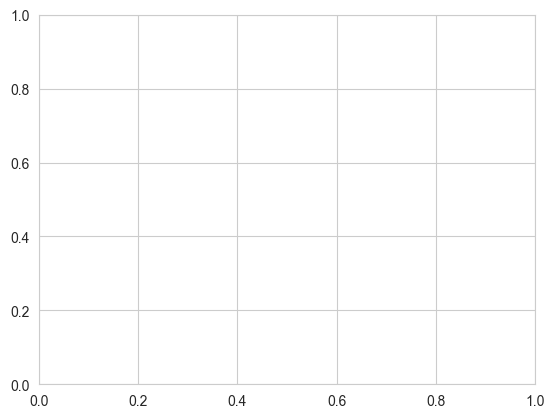

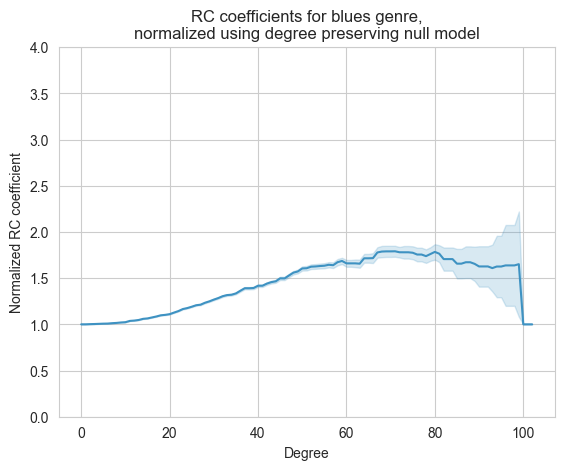

Genre: classical


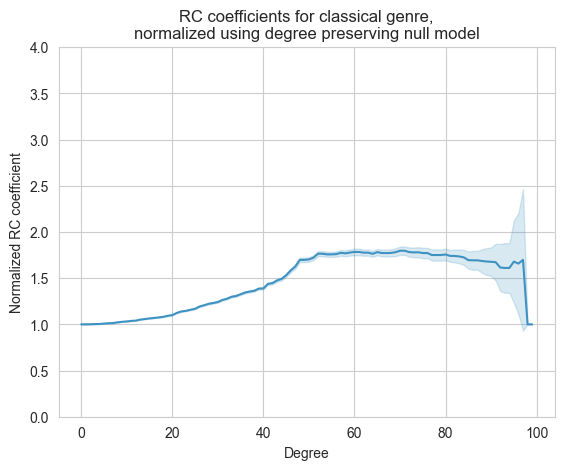

Genre: country


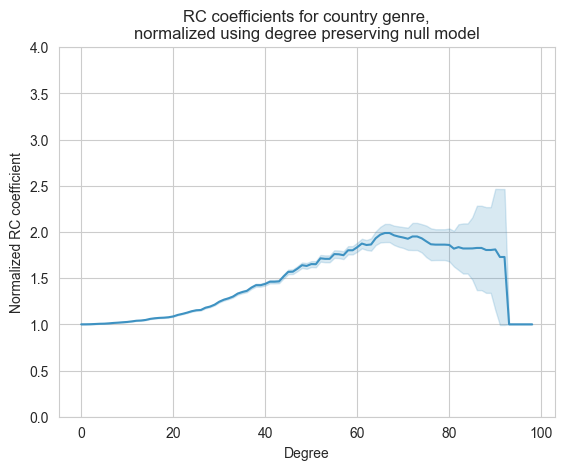

Genre: disco


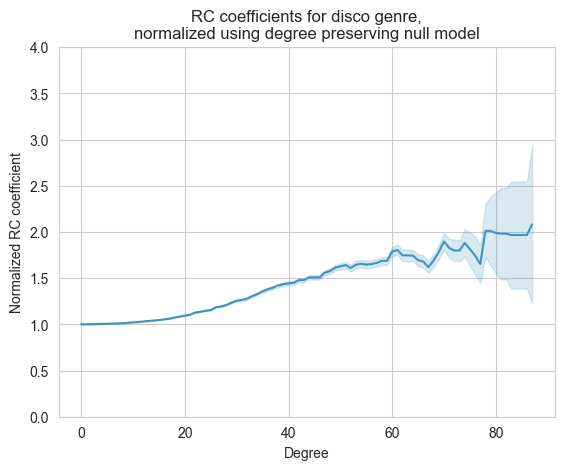

Genre: hiphop


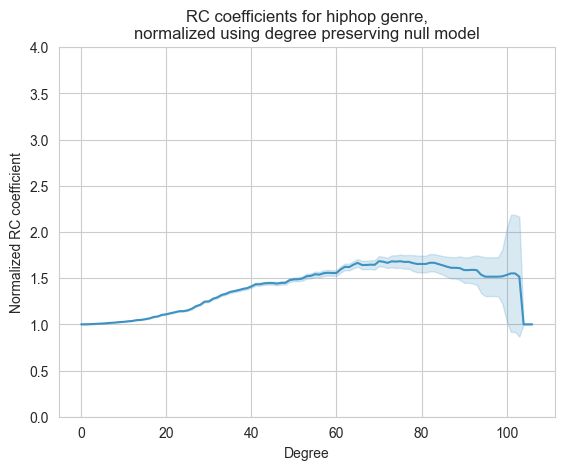

Genre: jazz


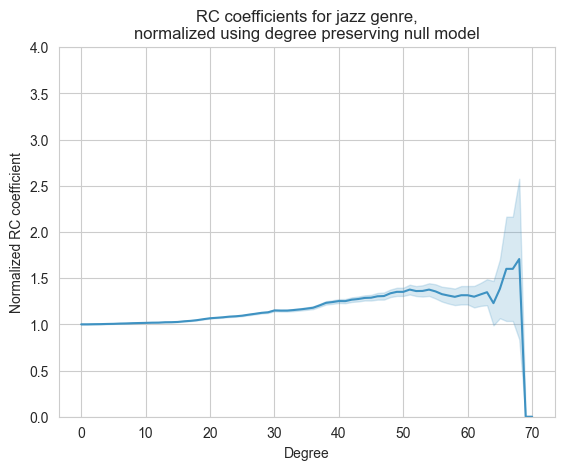

Genre: metal


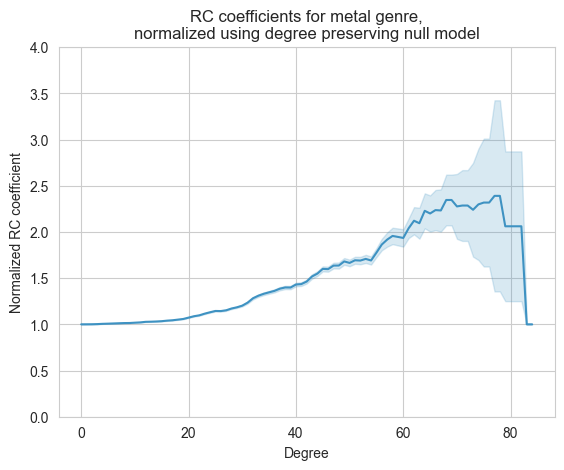

Genre: pop


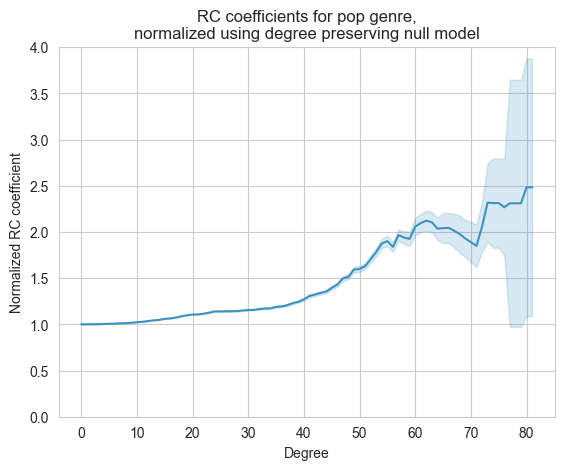

Genre: reggae


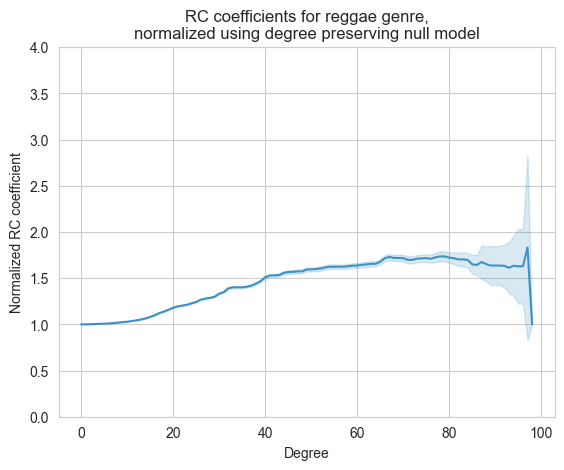

Genre: rock


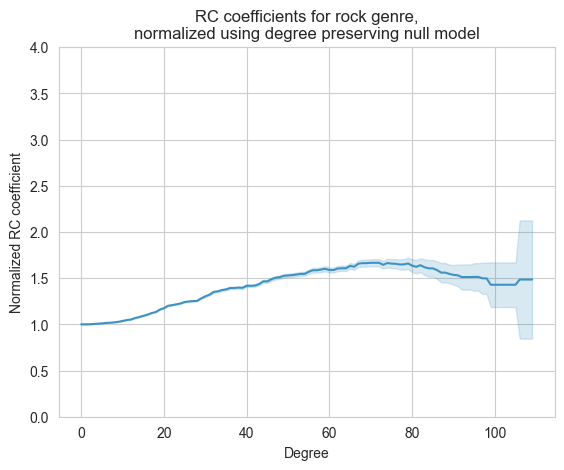

In [10]:
fig2, ax2 = plt.subplots()
for genre in genres:
    print(f"Genre: {genre}")
    ensemble_dp = pd.read_csv(f"../null-model-ensembles/networks/degree_preserving/{genre}_dp.csv")
    # ensemble_rgg = pd.read_csv(f"../null-model-ensembles/networks/random_geometric/{genre}_rgg.csv")
    edge_list = pd.read_csv(f"../networks/{genre}_edge_list.csv").rename(columns={"Node1": "source", "Node2": "target"})

    # rc_metrics_rgg = get_rc_data(ensemble_rgg, edge_list)
    rc_metrics_dp = get_rc_data(ensemble_dp, edge_list)

    plot_rc(rc_metrics_dp, genre)
    # plot_rc(rc_metrics_dp, genre=name, null_type="degree preserving")
    ax2.set(xlabel='Degree',
           ylabel="Normalized RC coefficient",
           title=f"RC coefficients for all genres,\nnormalized using degree preserving null model",
           ylim=(0,4))

    sns.lineplot(data=rc_metrics_dp,
                 x='degree',
                 y='normalized_rc_coefficient',
                 errorbar=None,
                 ax=ax2,
                 label = f'{genre}')

    rc_metrics_dp.to_csv(f"./metrics/{genre}_dp_rc.csv", index=False)

fig2.savefig(f"./plots/all_genres_rc_plot.png")